# Collecting the data from Google Trends
<p><font size='3', color="gray">author: Carina Blüm</font><br></p>
<p style="font-size:12pt">In this notebook the data from Google Trends is gathered for all professional female soccer players from the World Cup in 2015 in a timescale of one month. First, the panda package had to be installed in order to work with the gathered data later on.</p>

In [2]:
#pip install pandas
import pandas as pd
import pylab as pl
import numpy as np
import re

#pip install pytrends
from pytrends.request import TrendReq

import time

import csv

## Step 1: Google Trends data for all female players as a .csv-file
<p style="font-size:12pt">In the first step the created file "wc_2015.csv" has to be read. For each player name, the Google Trends search results for one month are gatherd via 'pytrend'. To normalize the values, each name is compared with a reference word (corresponding nation and 'soccer'). The results are written in the femalePlayer_Google_Trends.csv-file.<br></p>   

In [5]:
dfFemale_Player = pd.read_csv("wc_2015.csv", sep=';')
FemalePlayer = ['Name']
dfFemale_Player[FemalePlayer]#.to_csv('malePlayers.csv')

pytrend = TrendReq()

f = open('femalePlayer_Google_Trends.csv','w')
f.write('date,Name,Reference,isPartial\n')
f.close()

for i in range(0,552):
    kw_list = [dfFemale_Player['Name'][i],dfFemale_Player['Nation'][i]+" football"]
    pytrend.build_payload(kw_list, timeframe='today 1-m', geo='', gprop='')
    time.sleep(1.2)

# Interest Over Time
    pytrend.interest_over_time().to_csv('femalePlayer_Google_Trends.csv',mode='a')

## Step 2: Sum of Google Trends data for each female soccer player as .csv-file
<p style="font-size:12pt">Afterwards, the results have to be summed up which is realized through the following code.<br></p> 

In [3]:
dfMale_Google = pd.read_csv("femalePlayer_Google_Trends.csv")

numberOfPlayers = 552

f = open('Sum_Female_GoogleTrend.csv','w', encoding = 'utf8')
f.write('Name;Sum GoogleTrends\n')

for i in range(0,30*numberOfPlayers,30):
    sum = 0
    for j in range(i+1,i+28):
        x = int(dfMale_Google.iloc[j,1])
        sum += x
    f.write(str(dfMale_Google.iloc[i,1]) + str(';') + str(sum) + '\n')
f.close()

<p>
<br></p> 

<p style="font-size:12pt">The Google Trends results of the female soccer players were ordered for the upcoming analysis.<br></p> 

In [4]:
df1 = pd.read_csv("Sum_Female_GoogleTrend.csv", sep=';')
columns =['Name', 'Sum GoogleTrends']
df1[columns].sort_values(by='Sum GoogleTrends', ascending=[False])

,Name,Sum GoogleTrends
370,Monica,2143
377,Marta,2063
204,Rose Bella,1439
364,Abby Wambach,1385
367,Christen Press,1358
357,Alex Morgan,1210
30,Ma Jun,1209
358,Morgan Brian,1201
32,Li Ying,1166
354,Carli Lloyd,1115


<p>
<br></p> 

<p style="font-size:12pt">Also the number of caps have been ordered descendant for the analysis of the data.<br></p> 

In [5]:
df1 = pd.read_csv("wc_2015.csv", sep=';')
columns =['Name', 'Matches']
df1[columns].sort_values(by='Matches', ascending=[False])

,Name,Matches
347,Christie Rampone,306
364,Abby Wambach,242
11,Christine Sinclair,222
353,Heather O'Reilly,219
336,Therese Sjögran,209
239,Homare Sawa,197
354,Carli Lloyd,195
351,Shannon Boxx,190
145,Solveig Gulbrandsen,179
345,Hope Solo,170


## Step 3: Generate graphs
### 3.1 Female soccer player (Google Trends data compared with number of international caps)
<p style="font-size:12pt">The following code creates a plot of the female soccer players with the aid of matplotlib from python. The number of international caps is displayed on the x-axis, the values from the Google Trends requests on the y-axis.<br></p> 

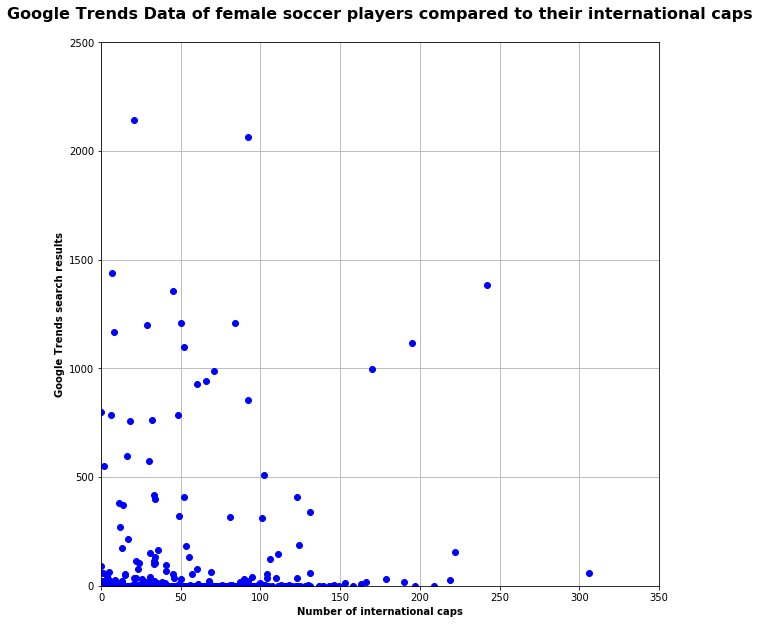

In [7]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd


df1 = pd.read_csv("wc_2015.csv", sep=';')
columns =['Matches']

df2 = pd.read_csv("Sum_Female_GoogleTrend.csv", sep=';')
columns2 = ['Sum GoogleTrends']
# x axis
x = df1[columns]  #.sort_values(by='Matches')
# y axis
y = df2[columns2]
#print(x,y)
plt.figure(figsize=(10,10))
plt.plot(x, y, 'bo')
plt.xlabel('Number of international caps', fontweight='bold')
plt.ylabel('Google Trends search results', fontweight='bold')
plt.title('Google Trends Data of female soccer players compared to their international caps' + '\n', fontsize=16, fontweight='bold')
plt.axis([0, 350, 0, 2500])
plt.grid(True)
plt.show()